# Import necessary packages

In [1]:
import os
os.chdir('E:/github/MSBERT')
import pickle
import torch
import matplotlib.pyplot as plt
from data.ProcessData import MakeTrainData
from model.MSBERTModel import MSBERT
from model.utils import ModelEmbed
from scipy.spatial.distance import cosine

C:\Users\Administrator\Anaconda3\envs\FDNet\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def PlotExample(example_msms,idx):
    plt.figure()
    plt.vlines([float(i) for i in example_msms[idx][0]],0,example_msms[idx][1])
    plt.hlines(0,0,max([float(i) for i in example_msms[idx][0]]))
    plt.xlabel('m/z')
    plt.ylabel('Intensity')

# Load example data

In [3]:
with open('example/example_msms.pickle', 'rb') as f:
        example_msms = pickle.load(f)
with open('example/example_precursor.pickle', 'rb') as f:
    example_precursor= pickle.load(f)

# Draw example mass spectrometry

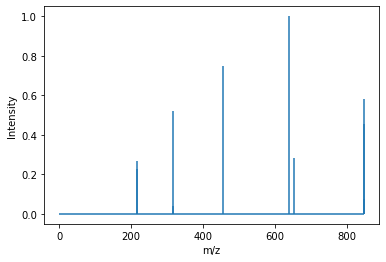

In [4]:
PlotExample(example_msms,0)

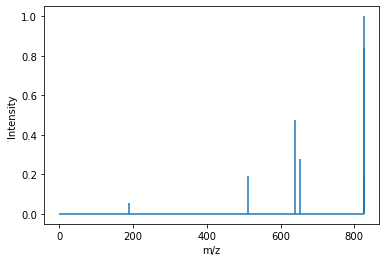

In [5]:
PlotExample(example_msms,1)

# Building Training Data

In [7]:
example_data,word2idx= MakeTrainData(example_msms,example_precursor,100)

# Load MSBERT model

In [9]:
model_file = 'E:/MSBERT_model/1025/MSBERT.pkl'
model = MSBERT(len(word2idx), 512, 6, 16, 0,100,3)
model.load_state_dict(torch.load(model_file))

<All keys matched successfully>

# MSBERT embedding

In [10]:
example_arr= ModelEmbed(model,example_data,2)

1it [00:01,  1.31s/it]


# Calculate cosine similarity

In [11]:
cos = cosine(example_arr[0,:],example_arr[1,:])
print(cos)

0.7960373014211655
